In [1]:
import networkx as nx
from load_data import weighted_network_creation
from utils import plt_directed
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt

# Community Analysis

So heuristically speaking a community is a set of nodes that are locally dense but globally (very) sparse.
Which can be very useful.
   * Reduce the size/complexity of a huge network.
   * Find key groups, latent structure or patterns of relationships.
But also have to be careful.
   * What do they mean?
   * How did they form? Trivial? Complex?

**Community:**

From ** a heuristic** point of view, a community is a set of nodes that are locally dense but globally (very) sparse which can be operationalized a few ways for a community C. For example, the nodes in C all belong to the same clique, which means that all nodes in the community are connected to all other nodes in the community. For each node in the community, its degree within the community (kn_int) is greater than its degree outside the community (kn_ext). When kn_int > kn_ext for all n in C, C is called a strong community. In opposition, if the sum of internal degrees is greater than the sum of external degrees. When C is called a weak community.

From a **mathematical point** of view, a community is a connected subgraph we have identified as containing nodes who “belong together” using
some method, criteria, or algorithm. The community structure of a graph (as a whole) is a partition (or partitioning) of the graph.

From a **conceptual point** of view, a community is a set of nodes we have decided “belong together”. This belonging concept exists within the links of the network and thus the adjacency matrix is even capable of capturing what we’re looking for.

**Partition:**

When finding the communities of a network, what we are ultimately doing is assigning a “group” to each node, with the goal of having each node that belongs together in the same group. In practice, deciding which nodes belong together is often about optimizing some measure, for example, numbers of links that stay within groups versus the number of links that cross the boundaries of groups. In optimizing whatever measure we may be interested in, what we are actually doing is exploring the space of all possible node-group assignments.

**Hierarchical clustering**:

**Hierarchical clustering** approaches sidestep the optimization problem by considering only “local” optimization criteria. They come in two flavors:
   * Agglomerative - in which nodes start as a member of no community and are successively added to communities based on some well-defined criteria.
   * Divisive - in which nodes all start as part of the same community which is then successively broken apart according to some well-defined criteria.

These algorithms have really only two ingredients: A method for calculating distances between clusters and a rule for selecting the optimal number of steps to stop after. Divisive approaches work in the opposite direction. All nodes start in the same community, and links are successively deleted according to some criteria/rule. The connected subgraphs represent the communities at each stage. For example, the Girvan-Newman Algorithm first calculates the betweenness centrality of all links then delete the link with highest betweenness centrality and then return to step 1. until all links are deleted.

**Modularity:**

**Modularity** is a measure of a specific network partitioning (community assignment of each node). It essentially comes down to measuring how many more links remain within communities relative to how many passes between communities.
The modularity of an individual cluster, C, is defined as:
$$M_{C} = \frac{L_{C}}{L}-(\frac{k_{C}}{2L})^2$$
where LC is the number of intra-community links, kc the sum of the degree of nodes in C and L is the number of links in the network.
The modularity of specific partitioning of a network is the sum of the modularity scores of all communities:
$$M = \sum_{C}[\frac{L_{C}}{L}-(\frac{k_{C}}{2L})^2]$$
And thus the goal from there is to find the partitioning with the highest M.

**Info Map:**

Most community detection algorithms deal best with undirected, unweighted networks. But there is a quite elegant algorithm for finding communities in directed and/or weighted networks. Instead of focusing on counting intra- and inter-community links it looks at dynamics on networks and then uses information theory to come up with optimal communities. 
The main idea about the use of information theory is that it wants to minimize the length of the
string required to describe the random walk(s). Information theory offers many avenues to do this, but essentially all boil down to encoding the
most commonly walked upon nodes (and sequences of nodes) with the shortest labels possible. What Infomap introduces is a hierarchical encoding, in which each node is first labeled by its community, and then by its node number inside that community.
When the walker is moving, the community label only gets passed when it moves from one community to another.

As a conclusion, infomap finds the partitioning of the network that results in minimal use of the (expensive) inter-community labels.
One of the nice properties, though, is it can be done in a meaningful way for any network upon which a random walker makes sense - un/directed, un/weighted, all the same. The downside is the same as others that rely on optimization - fighting the NP-complete nature.

**Method:**
   * Visualize: Summing up on community detection for visualization purposes is an effective way. In fact, networks are almost always too large to be effectively visualized. Thus we need to simplify somehow. And communities can be a decent way to simplify.
   * Examine statistics: The distribution of community sizes, Community degree distribution (treat communities as nodes), Community betweenness centrality (again, treating communities as nodes).
   * Community subgraphs as networks: We can also look inside communities and treat the subgraph of nodes in each community as a
network itself, and then do any of the analyses we would do on any other network. Anything you can do in a normal network you can do to a community subgraph. Just keep in mind that it may not make sense and/or be comparable as communities are dense by definition.
   * Look at the distribution of external variables. Which variables seem to characterize the communities well. Then we will look at which ones clearly do not. And then we will look for outlier nodes within specific communities.

In clique percolation a community is a union of overlapping $k$-cliques. The output of the algorithm highly depends on the parameter $k$. As we saw in the previous analysis, the average degree of the given network is around 10. Let us set $k = 5$. The `networkx` package has its own in-built function for finding $k$-clique communities.

**Directed vs Undirected:**

In [2]:
Airport_Network_weighted = weighted_network_creation()
# Use the undirected version of the network for this one.
Undirected_Airport_Network = Airport_Network_weighted.to_undirected()

In [3]:
from networkx.algorithms.community import k_clique_communities
list_clique_communities = list(k_clique_communities(Undirected_Airport_Network, k=5))
print('The different communities find with the k clique percolation community in the undirected version of the graph have the following number of nodes :')
for i in range(len(list_clique_communities)):
    print(len(list_clique_communities[i]))

The different communities find with the k clique percolation community in the undirected version of the graph have the following number of nodes :
1069
7
7
5
5
6
5
5
5
5
5
5
6
5
6
7
5
5
5
5
6
5


Let use now the girvan_newman algorithm to analyse the directed version of the graph: 

In [4]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
comp =girvan_newman(Airport_Network_weighted)
it = 0
print('The different communities find with the girvan newman algorithm in the directed version of the graph have the following number of nodes :')
for communities in itertools.islice(comp, 4):
    it +=1
    print('Iteration', it)
    print(tuple(len(sorted(c)) for c in communities))

The different communities find with the girvan newman algorithm in the directed version of the graph have the following number of nodes :
Iteration 1
(3256, 10, 52, 4, 4, 4, 2, 2)
Iteration 2
(3152, 10, 104, 52, 4, 4, 4, 2, 2)
Iteration 3
(3111, 41, 10, 104, 52, 4, 4, 4, 2, 2)
Iteration 4
(3088, 23, 41, 10, 104, 52, 4, 4, 4, 2, 2)


**Visualization:**

Now, let us find the best partition using the Louvain algorithm. Since the algorithm involves some randomization, we fix the random seed to make it reproducible.

In [5]:
import community as community 
np.random.seed(42)
partition = community.best_partition(Undirected_Airport_Network)
labels = set(partition.values())
community_counts = {i: list(partition.values()).count(i) for i in labels}
print('The number of nodes in each community found with Louvain Algorithm in the undirected version of the graph: \n',community_counts)

The number of nodes in each community found with Louvain Algorithm in the undirected version of the graph: 
 {0: 258, 1: 512, 2: 759, 3: 76, 4: 532, 5: 379, 6: 9, 7: 165, 8: 213, 9: 22, 10: 98, 11: 10, 12: 23, 13: 26, 14: 9, 15: 3, 16: 16, 17: 10, 18: 10, 19: 6, 20: 114, 21: 12, 22: 25, 23: 12, 24: 4, 25: 4, 26: 4, 27: 8, 28: 7, 29: 4, 30: 2, 31: 2}


Plot the network so that each node's color represents the community it belongs to:

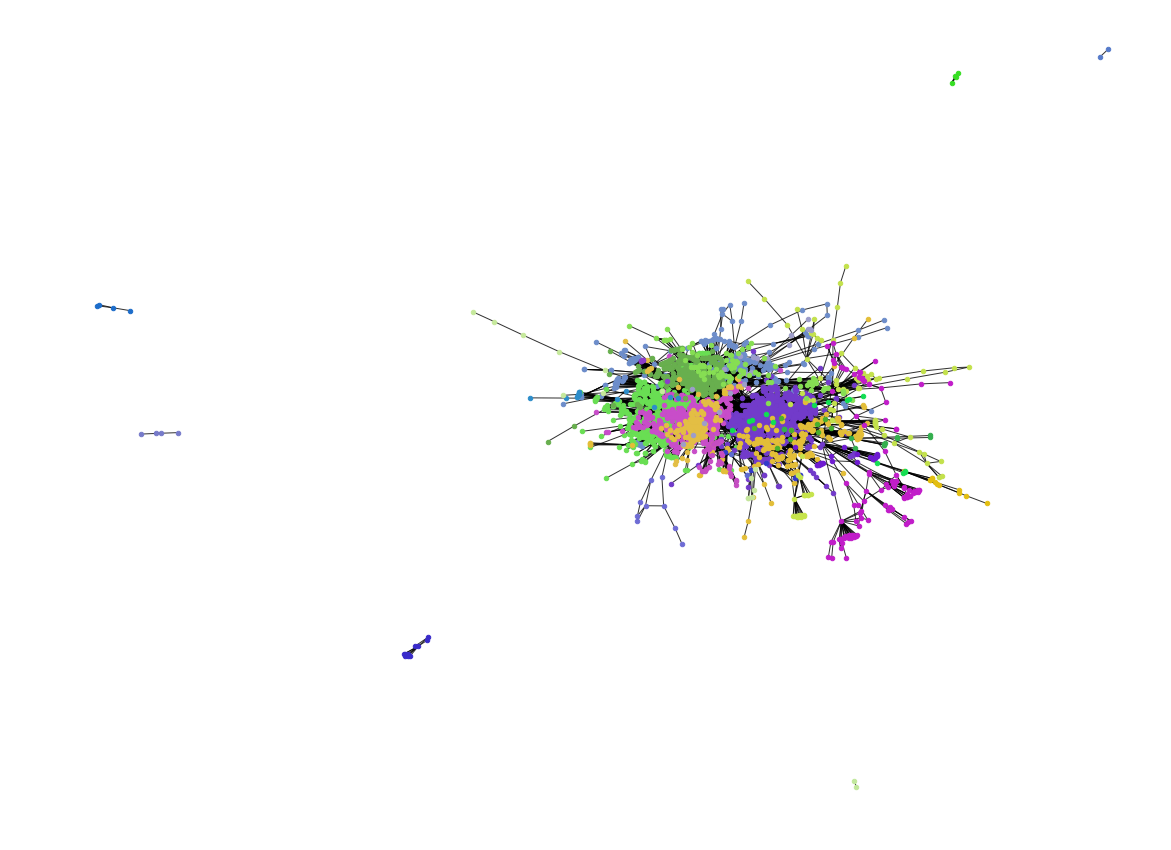

In [6]:
# define a colormap of 8 random colors
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5", "#e3be44",
                     "#e3be38", "#9d9dca", "#86de53", "#333bca", "#c6e44c", "#c54dc2", "#49af2e", "#5e6cd1",
                     "#2d8dca", "#11de53", "#392bca", "#c4e59c", "#c11dc9", "#34af4e", "#6e1cd1", "#e3be11",
                     "#1d6dca", "#16de53", "#777bca", "#c6e99c", "#8d3dca", "#36de23", "#567bca", "#c1e89c", "#c4e11c",])

plt.figure(figsize=(20,15))
pos = nx.spring_layout(Undirected_Airport_Network)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(Undirected_Airport_Network, pos, list_nodes, node_size = 20, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(Undirected_Airport_Network, pos, alpha=0.8)
plt.axis('off')
plt.show()

This visualization of the communities reaffirm several results found during the analysis :
   * **The graph has small disconnected networks, each one form a different community (independent network, see above example on Polynesia)** 
   * **The entire network is made of smaller subgraphs.** As you can see on the list, there are 32 communities. 4 of them are huge (superior to 400 nodes) and the others are smaller (two around 200 nodes and then inferior to 50 nodes). The bigger subnetwork should correspond to wider geographic zones like Europe, South America and Asia. In fact, in the real world, the airlines between theses part of the world are well developed in addition to the well-developed network inside each area. This kind of well-linked network could produce a huge community.

Now, the analysis of some subgraph will be done to prove to reaffirm a kind of geographical homophily. In fact, nodes belonging to a community should be in the same geographical area. 

**Subgraph**

In [7]:
def list_node_community(Undirected_Airport_Network, partition, n):
    # Get the list of nodes in community labeled 5
    community_node = [nodes for nodes in partition.keys() if partition[nodes] == n]

    # Extract the graph
    graph_community_node = Undirected_Airport_Network.subgraph(community_node)

    # plot the graph of this community
    plt.figure(figsize=(12,8))
    nx.draw_networkx(graph_community_node, pos=nx.spring_layout(graph_community_node), node_size=500, alpha=0.8)
    plt.axis('off')
    plt.show()

    print('Airport belonging to this community are from :')
    for i in graph_community_node.node :
        print(graph_community_node.node[i]['City'],' from ', graph_community_node.node[i]['Country'])

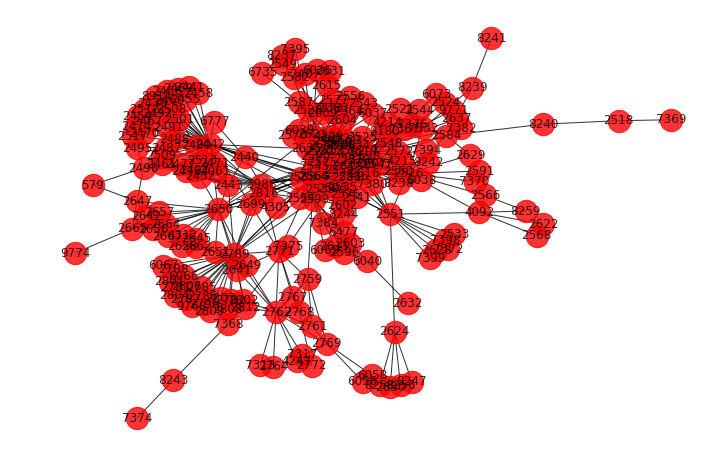

Airport belonging to this community are from :
Barcelos  from  Brazil
Patos de Minas  from  Brazil
Guarapuava  from  Brazil
President Prudente  from  Brazil
Guanambi  from  Brazil
Antofagasta  from  Chile
Tacna  from  Peru
Sao Jose Dos Campos  from  Brazil
Ji-Paraná  from  Brazil
Resistencia  from  Argentina
Puerto Montt  from  Chile
Rondonopolis  from  Brazil
Tumbes  from  Peru
Parintins  from  Brazil
Bahia Blanca  from  Argentina
Campos  from  Brazil
Catamarca  from  Argentina
Iguazu Falls  from  Argentina
Bointo  from  Brazil
Barreiras  from  Brazil
Rio Branco  from  Brazil
San Rafael  from  Argentina
Sucre  from  Bolivia
Teresina  from  Brazil
Viedma  from  Argentina
Sao Felix do Xingu  from  Brazil
Sao Paulo  from  Brazil
Joinville  from  Brazil
Paulo Alfonso  from  Brazil
Montes Claros  from  Brazil
El Calafate  from  Argentina
Rio De Janeiro  from  Brazil
Sao Felix do Araguaia  from  Brazil
Comodoro Rivadavia  from  Argentina
Guayaramerín  from  Bolivia
Riberalta  from  Bolivia


In [8]:
list_node_community(Undirected_Airport_Network, partition, 8)

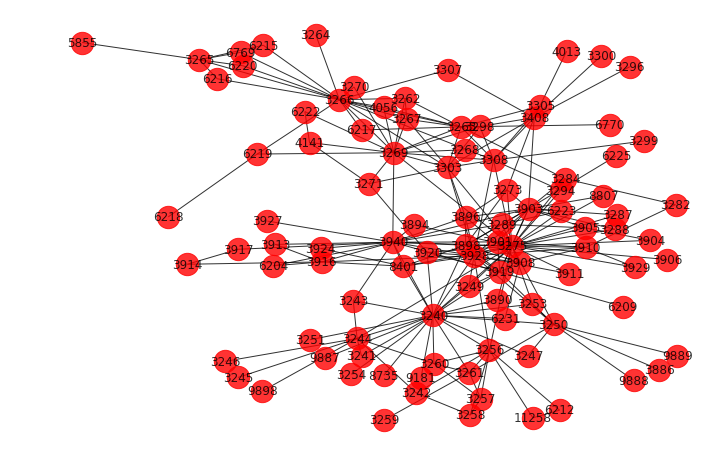

Airport belonging to this community are from :
Manado  from  Indonesia
Mukah  from  Malaysia
Naha  from  Indonesia
Sorong  from  Indonesia
Manokwari  from  Indonesia
Pangkalan Bun  from  Indonesia
Babo  from  Indonesia
Bau-Bau  from  Indonesia
Tanjung Pinang  from  Indonesia
Kupang  from  Indonesia
Bima  from  Indonesia
Pangkal Pinang  from  Indonesia
Ujung Pandang  from  Indonesia
Sandakan  from  Malaysia
Bandar Lampung-Sumatra Island  from  Indonesia
Banjarmasin  from  Indonesia
Pontianak  from  Indonesia
Tanjung Redep-Borneo Island  from  Indonesia
Balikpapan  from  Indonesia
Labuan  from  Malaysia
Banda Aceh  from  Indonesia
Waikabubak-Sumba Island  from  Indonesia
Redang  from  Malaysia
Bario  from  Malaysia
nan  from  nan
Melonguane  from  Indonesia
Ambon  from  Indonesia
Alor Setar  from  Malaysia
Tanjung Pandan  from  Indonesia
Kao  from  Indonesia
Bakalalan  from  Malaysia
nan  from  nan
Gorontalo  from  Indonesia
Yogyakarta  from  Indonesia
Padang  from  Indonesia
Jayapura  f

In [9]:
list_node_community(Undirected_Airport_Network, partition, 10)

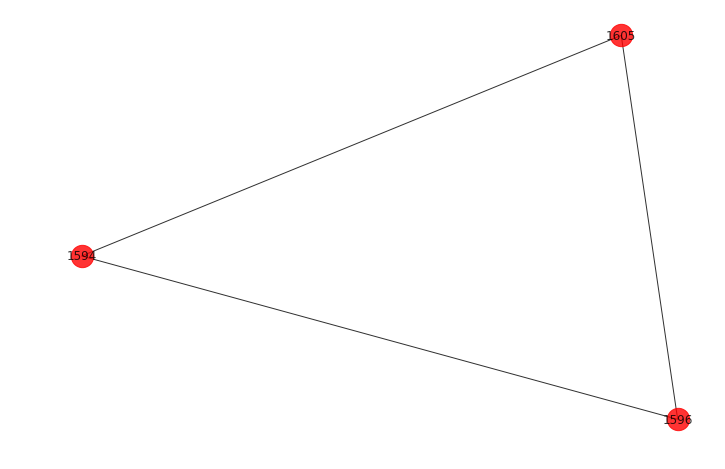

Airport belonging to this community are from :
Elat  from  Israel
Tel-aviv  from  Israel
Haifa  from  Israel


In [10]:
list_node_community(Undirected_Airport_Network, partition, 15)

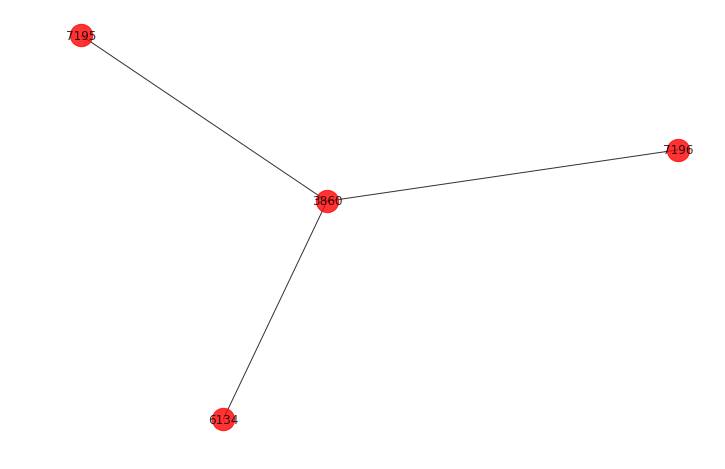

Airport belonging to this community are from :
Atka  from  United States
Akutan  from  United States
Nikolski  from  United States
Unalaska  from  United States


In [11]:
list_node_community(Undirected_Airport_Network, partition, 26)

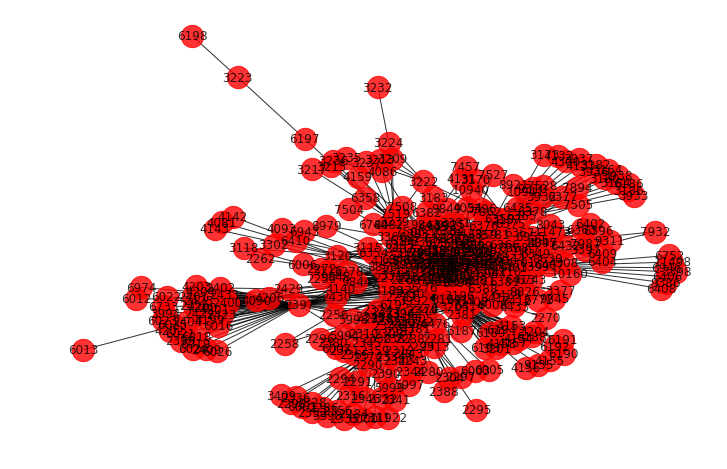

Airport belonging to this community are from :
Karamay  from  China
Zhuhai  from  China
Xiahe city  from  China
Chongqing  from  China
Nakhon Si Thammarat  from  Thailand
Nagoya  from  Japan
Catarman  from  Philippines
Qingdao  from  China
Tagbilaran  from  Philippines
Hotan  from  China
Erenhot  from  China
Fuzhou  from  China
Shiquanhe  from  China
Kwangju  from  South Korea
Okinawa  from  Japan
Rach Gia  from  Vietnam
Guiyang  from  China
Nanki-shirahama  from  Japan
nan  from  nan
Dali  from  China
Tengchong  from  China
Yancheng  from  China
Yuncheng  from  China
Romblon  from  Philippines
Kitakyushu  from  Japan
Kushiro  from  Japan
Mandalay  from  Burma
Dumaguete  from  Philippines
Phitsanulok  from  Thailand
Changchun  from  China
Ca Mau  from  Vietnam
Xingyi  from  China
Laoag  from  Philippines
Mackenzie British Columbia  from  Canada
Mae Hong Son  from  Thailand
Dayong  from  China
Roi Et  from  Thailand
nan  from  nan
Tachilek  from  Burma
Puerto Princesa  from  Philippines

In [12]:
list_node_community(Undirected_Airport_Network, partition, 5)

***In these subgraphs corresponding to one community each time, it can clearly be seen that the collection of node belongs to a specific geographical area. Thus, the conclusion drawn in the previous section using homophily seems to be true.***

**Induced Graphs**

Given the partition, we can construct a new graph where the communities are now nodes, and each edge's weight is the total weight of edges between the corresponding communities. This new graph is said to be *induced* by the partition. The `community` function has an in-built function for this.

In [13]:
induced_graph = community.induced_graph(partition, Undirected_Airport_Network)
induced_graph.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}})

In [14]:
induced_graph.edges(data=True)

EdgeDataView([(0, 0, {'weight': 531}), (0, 5, {'weight': 57}), (0, 10, {'weight': 10}), (0, 1, {'weight': 40}), (0, 2, {'weight': 22}), (0, 8, {'weight': 3}), (1, 1, {'weight': 1911}), (1, 4, {'weight': 651}), (1, 2, {'weight': 65}), (1, 8, {'weight': 19}), (1, 7, {'weight': 134}), (1, 5, {'weight': 242}), (1, 22, {'weight': 2}), (1, 20, {'weight': 1}), (1, 17, {'weight': 4}), (1, 9, {'weight': 6}), (1, 14, {'weight': 3}), (1, 10, {'weight': 52}), (1, 21, {'weight': 2}), (1, 16, {'weight': 2}), (1, 11, {'weight': 3}), (1, 6, {'weight': 2}), (2, 2, {'weight': 4155}), (2, 3, {'weight': 24}), (2, 4, {'weight': 413}), (2, 5, {'weight': 95}), (2, 12, {'weight': 5}), (2, 14, {'weight': 7}), (2, 8, {'weight': 106}), (2, 7, {'weight': 16}), (2, 19, {'weight': 2}), (2, 16, {'weight': 2}), (2, 22, {'weight': 4}), (2, 20, {'weight': 11}), (2, 27, {'weight': 1}), (2, 17, {'weight': 6}), (2, 21, {'weight': 2}), (2, 23, {'weight': 1}), (2, 25, {'weight': 1}), (3, 3, {'weight': 108}), (4, 4, {'weight

The "data=True" argument allows accessing the information attached to the edges (the same applies for nodes). In this particular case, the only information attached to each edge is its weight, but it can be much richer (either we can attach some information, or it might already exist in some graphs).

Note that there are also loops in this graph.

Now, let us implement a function for plotting weighted graphs where each edge's width is proportional to its weight.

In [15]:
def plot_graph(G):
    plt.figure(figsize=(12,8))
    pos = nx.random_layout(G)
    
    # plot nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, alpha=0.5)
    
    # plot edges with widths depending on weights
    nx.draw_networkx_edges(G, pos, width = [d['weight']/30 for u,v,d in G.edges(data=True)], font_color = 'k', alpha = 0.9)

    # add edges' labels with weights
    edge_labels=dict([((u,v), d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.axis('off')
    plt.show()

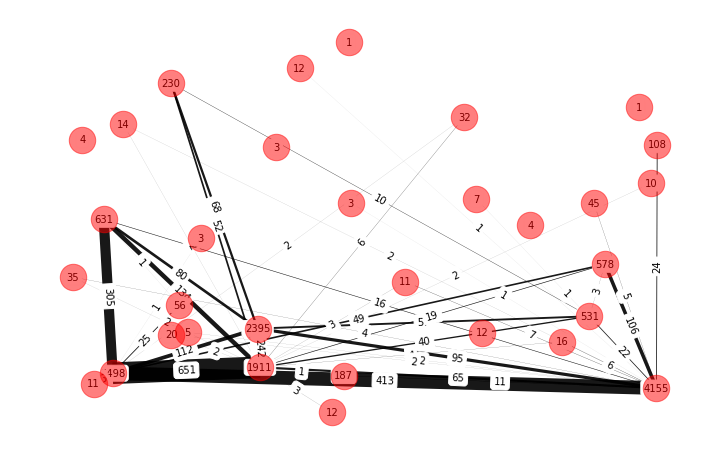

In [16]:
plot_graph(induced_graph)

This graph representation shows us the interaction between each community. 
**The conclusion that can be drawn from this visualization is the existence of extremely important communities concentrating the more important part of the airports' activities.** This observation can be noticed thanks to the huge edges. It makes sense with the real world: think about Europe connected to Asia, connected to North America connected to South America and then again connected to Europe as an example. Moreover, thanks to this graph, we can also notice **the existence of smaller communities inside a smaller geographical area which are more regional airports and routes compared to the big edges corresponding to the mains routes in the world.**

These main roads can be better visualized by putting a threshold on edges weights :

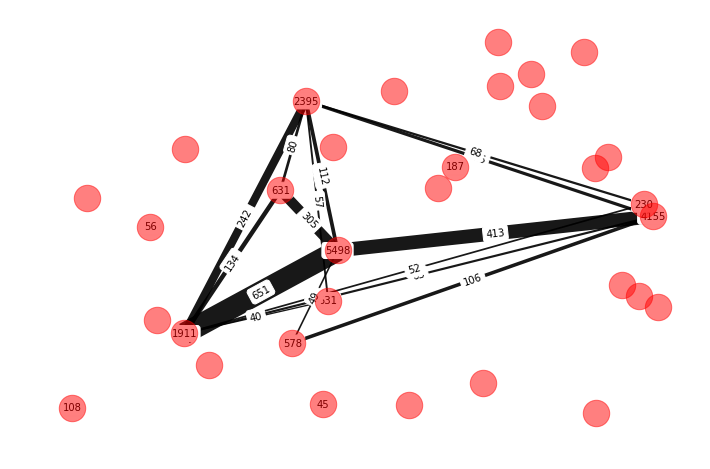

In [17]:
# specify the threshold
threshold = 40
T_reduced = community.induced_graph(partition, Undirected_Airport_Network)

# find the edges which weight is less than the threshold
edges_to_remove = [(u,v) for u,v,d in T_reduced.edges(data=True) if d['weight'] < threshold]

# remove these edges from the graph
T_reduced.remove_edges_from(edges_to_remove)

plot_graph(T_reduced)

***Investigate on the induced graph shows the existence of two encapsulated level of airport network. The higher level corresponds to the mains airplanes routes in the world while the lower level corresponds to the more regional network allowing customers to reach smaller distance in term of geographical metric.***